**STEP 1:PROBLEM DEFINITION**

**Problem Statement for India’s GHG Emission Prediction**
**Objective:**
Predict India’s future greenhouse gas (GHG) emissions by sector (Energy, Agriculture, Industrial Processes, etc.) and gas type (CO₂, CH₄, N₂O) using historical data (1990–2021) to support climate policy decisions.

**Key Questions:**
1. How have India’s GHG emissions evolved across sectors?
2. Which sectors/gases contribute most to emissions?
3. What will emissions look like in 2030 under current trends?

**Scope:**
1. Target Variable: Emissions (MtCO₂e)
2. Features: Year, Sector, Gas Type, Economic Indicators (if added later).

**Output:** Time-series forecasts + sector-wise insights.

**Impact:**
Help policymakers prioritize decarbonization strategies (e.g., renewable energy adoption in the Energy sector).



**STEP 2:DATA COLLECTION**

**Objective:**
Identify and compile a high-quality dataset that provides India’s historical greenhouse gas (GHG) emissions with the following criteria:
* Temporal Coverage: Long-term trends (e.g., 1990–2021).
* Sectoral Breakdown: Energy, Agriculture, Industrial Processes, Waste, etc.
* Gas Types: CO₂, CH₄, N₂O.
* Reliability: Government or research-backed sources.

**Data Sources**
* Climate Watch - Primary GHG emissions data
* MoEFCC (India) - Official national reports
* EDGAR - Global emissions database
* WRI CAIT - Historical trends
* India GHG Platform - Sector-specific data

Dataset compiled from these sources and uploaded to Kaggle by our team.

**2.1 IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress ONLY the specific observed=False warning
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    message="The default of observed=False is deprecated"
)

**2.2 LOAD THE DATASET**

In [2]:
import pandas as pd

# Load the dataset
ghg_data = pd.read_csv('/kaggle/input/greenhouse-gas-emission-india/historical_emissions.csv')

# Display first 3 rows
ghg_data.head(3)

,ISO,Country,Data source,Sector,Gas,Unit,2021,2020,2019,2018,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,IND,India,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,3444.46,3209.74,3417.45,3436.98,...,1682.10,1605.84,1576.64,1515.94,1464.12,1397.97,1353.38,1320.96,1297.66,1243.41
1,IND,India,Climate Watch,Total including LUCF,All GHG,MtCO₂e,3419.89,3176.03,3385.58,3407.73,...,1462.77,1384.94,1355.73,1295.25,1246.36,1180.19,1135.60,1103.18,1079.89,1025.63
2,IND,India,Climate Watch,Energy,All GHG,MtCO₂e,2427.37,2223.60,2432.88,2469.49,...,948.39,888.07,874.54,829.33,794.81,741.92,708.38,685.17,670.08,626.41


**STEP 3: DATA CLEANING AND PREPROCESSING**

**Objective:**
Prepare the raw GHG emissions dataset for analysis by:

* **Ensuring Data Integrity**– Handle missing values, duplicates, and inconsistencies.
* **Structuring for Analysis** – Convert from wide to long format for time-series modeling.
* **Feature Standardization** – Normalize units and handle categorical variables.
* **Validation Checks** – Verify totals and sectoral breakdowns for accuracy.

**3.1 :ENSURE DATA INTEGRITY**

In [3]:
# Check for missing values and duplicates
print("Missing values per column:")
print(ghg_data.isnull().sum())

print("\nDuplicate rows:", ghg_data.duplicated().sum())

# Drop irrelevant columns (if needed)
ghg_data_clean = ghg_data.drop(columns=['ISO', 'Country', 'Data source'])  # Keep only essential columns

Missing values per column:
ISO            0
Country        0
Data source    0
Sector         0
Gas            0
Unit           0
2021           0
2020           0
2019           0
2018           0
2017           0
2016           0
2015           0
2014           0
2013           0
2012           0
2011           0
2010           0
2009           0
2008           0
2007           0
2006           0
2005           0
2004           0
2003           0
2002           0
2001           0
2000           0
1999           0
1998           0
1997           0
1996           0
1995           0
1994           0
1993           0
1992           0
1991           0
1990           0
dtype: int64

Duplicate rows: 0


**3.2 :RESHAPE FROM WIDE TO LONG FORMAT**

In [4]:
# Melt year columns into rows
ghg_long = ghg_data_clean.melt(
    id_vars=['Sector', 'Gas', 'Unit'],
    var_name='Year',
    value_name='Emissions'
)

# Convert Year to integer
ghg_long['Year'] = ghg_long['Year'].astype(int)

print("\nReshaped data (long format):")
print(ghg_long.head(3))


Reshaped data (long format):
                 Sector      Gas    Unit  Year  Emissions
0  Total excluding LUCF  All GHG  MtCO₂e  2021    3444.46
1  Total including LUCF  All GHG  MtCO₂e  2021    3419.89
2                Energy  All GHG  MtCO₂e  2021    2427.37


**3.3: FEATURE STANDARDIZATION**

In [5]:
# Convert categorical variables to proper types
ghg_long['Sector'] = ghg_long['Sector'].astype('category')
ghg_long['Gas'] = ghg_long['Gas'].astype('category')

# Verify units (all should be MtCO₂e)
assert (ghg_long['Unit'] == 'MtCO₂e').all(), "Unit mismatch!"

**3.4: VALIDATION CHECKS**

In [6]:
# Just verify that 'Total excluding LUCF' exists and has expected values
total_emissions = ghg_long[
    (ghg_long['Sector'] == 'Total excluding LUCF') & 
    (ghg_long['Gas'] == 'All GHG')
]

print("Sample total emissions:")
print(total_emissions.head(3))

# Basic sanity check - emissions should be positive
assert (total_emissions['Emissions'] > 0).all(), "Invalid emission values found"

print("\n✅ Validation passed - totals exist and are positive")

Sample total emissions:
                   Sector      Gas    Unit  Year  Emissions
0    Total excluding LUCF  All GHG  MtCO₂e  2021    3444.46
54   Total excluding LUCF  All GHG  MtCO₂e  2020    3209.74
108  Total excluding LUCF  All GHG  MtCO₂e  2019    3417.45

✅ Validation passed - totals exist and are positive


**STEP 4: EXPLORATORY DATA ANALYSIS**

**Objective:**
To uncover patterns, trends, and relationships in India's GHG emissions data through:
* Sectoral Contribution Analysis
* Temporal Trend Analysis
* Correlational Insights
* Statistical Characterization


**4.1 :SECTORAL CONTRIBUTION ANALYSIS**

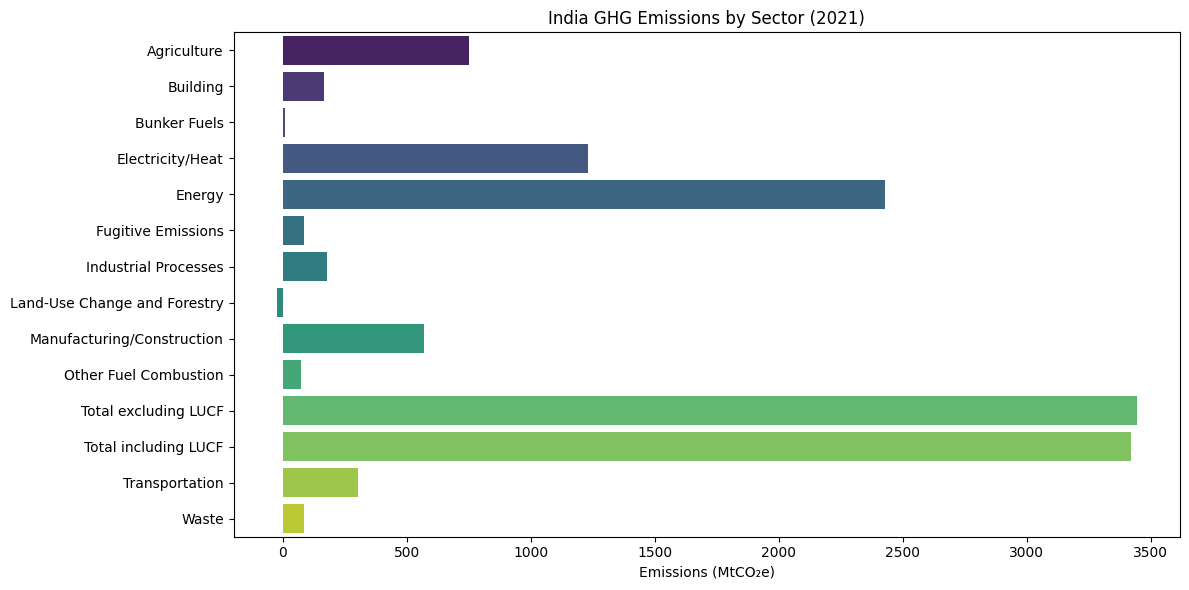

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data - explicitly handle categorical grouping
latest_year = ghg_long[ghg_long['Year'] == 2021]
all_ghg = latest_year[latest_year['Gas'] == 'All GHG'].copy()

# Convert Sector to categorical WITH observed=True
all_ghg['Sector'] = all_ghg['Sector'].astype('category')

# Plot with explicit aggregation
plt.figure(figsize=(12, 6))
sns.barplot(
    data=all_ghg,
    x='Emissions',
    y='Sector',
    palette='viridis',
    estimator=sum,
    errorbar=None,  # Disables confidence intervals
    orient='h'
)

plt.title('India GHG Emissions by Sector (2021)')
plt.xlabel('Emissions (MtCO₂e)')
plt.ylabel('')
plt.tight_layout()
plt.show()

**4.2: EMISSION TRENDS OVER TIME**

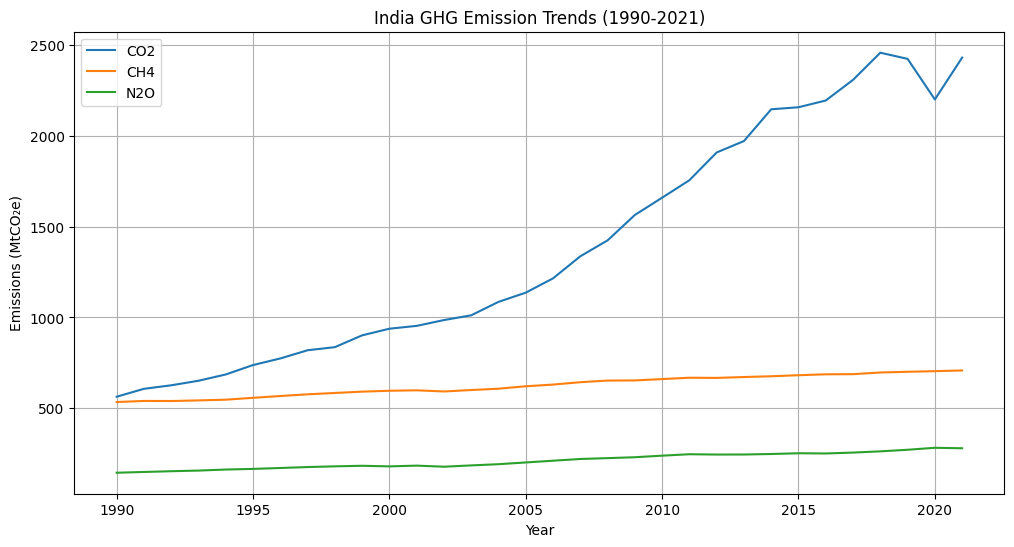

In [8]:
# Plot 3 major gases' historical trends
plt.figure(figsize=(12, 6))
for gas in ['CO2', 'CH4', 'N2O']:
    subset = ghg_long[
        (ghg_long['Gas'] == gas) & 
        (ghg_long['Sector'] == 'Total excluding LUCF')
    ]
    plt.plot(subset['Year'], subset['Emissions'], label=gas)

plt.title('India GHG Emission Trends (1990-2021)')
plt.xlabel('Year')
plt.ylabel('Emissions (MtCO₂e)')
plt.legend()
plt.grid(True)
plt.show()

**4.3 :CORRELATION HEATMP(SECTORS x GASES)**

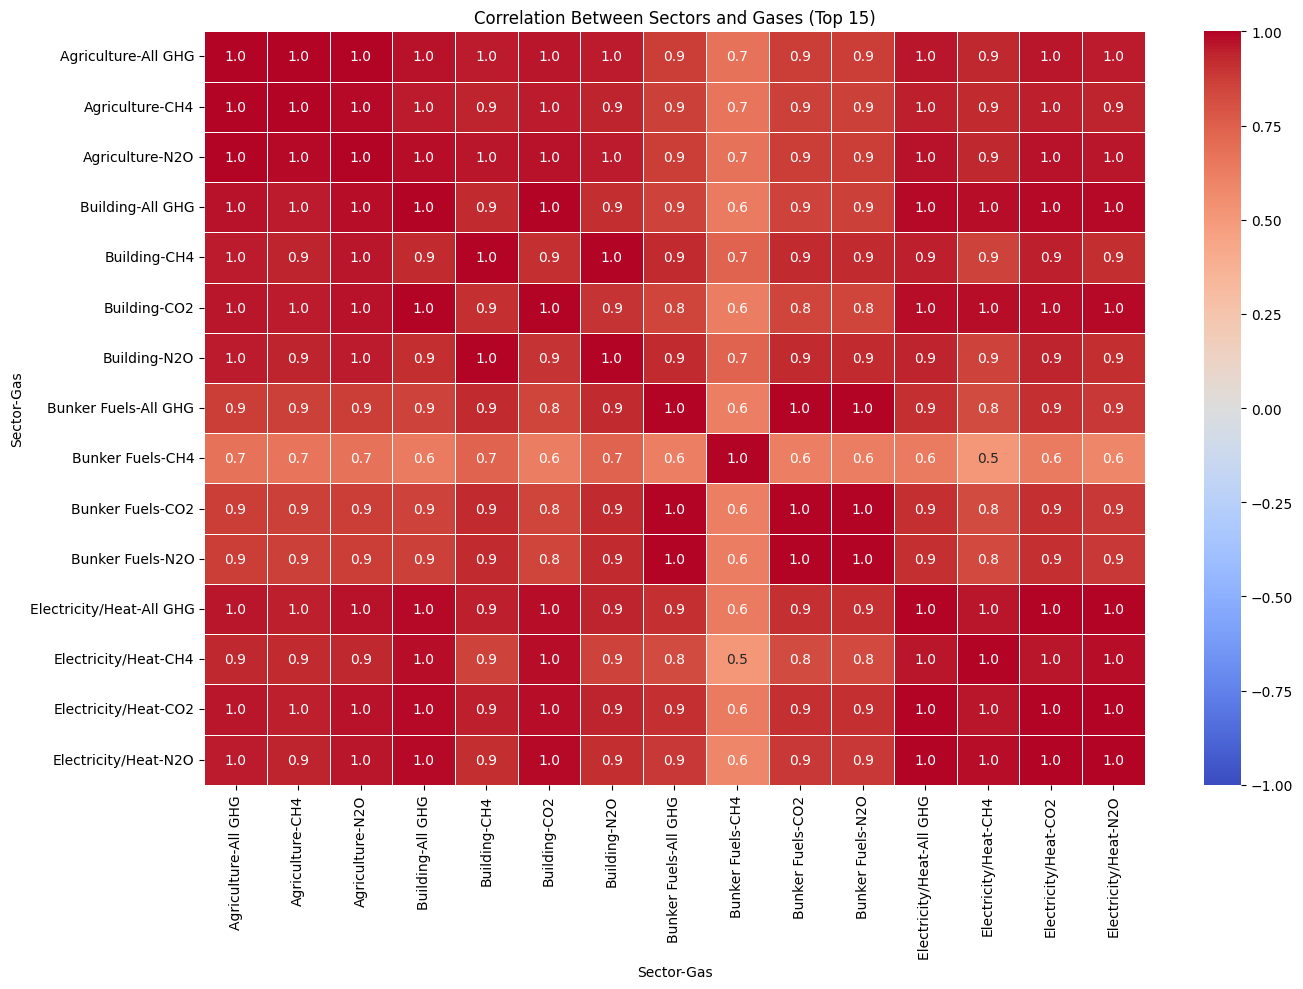

In [9]:
# Prepare the pivot table with explicit observed=True
pivot_data = ghg_long.pivot_table(
    index=['Year'],
    columns=['Sector', 'Gas'],
    values='Emissions',
    observed=True  # Explicitly handle categorical groupings
)

# Calculate correlations (unchanged)
corr_matrix = pivot_data.corr()

# Plot only the first 15x15 for clarity
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix.iloc[:15, :15],
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title('Correlation Between Sectors and Gases (Top 15)')
plt.tight_layout()
plt.show()

**4.4 STATISTICAL SUMMARY**

In [10]:
# Group by gas type
stat_summary = ghg_long.groupby('Gas')['Emissions'].agg(
    ['mean', 'std', 'min', 'max']
).sort_values('mean', ascending=False)

print("Emission Statistics by Gas Type:")
display(stat_summary)

Emission Statistics by Gas Type:


,mean,std,min,max
Gas,,,,
All GHG,569.220045,843.459477,-220.92,3444.46
CO2,442.624870,648.763420,-222.41,2457.83
CH4,141.223616,231.891113,0.00,713.14
N2O,46.375379,83.712662,0.00,285.13


**STEP 5: MODEL BUILDING**

**Objective:**
Develop predictive models for India's GHG emissions to:

1. Forecast future trends:
   * Predict sector-wise emissions (2025–2030)
   * Account for gas-specific variations
2. Identify key drivers:
   * Feature importance analysis for top sectors
   * Sensitivity analysis of policy scenarios



**5.1 DATA PREPARATION FOR MODELING**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Test MSE: 0.000645
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


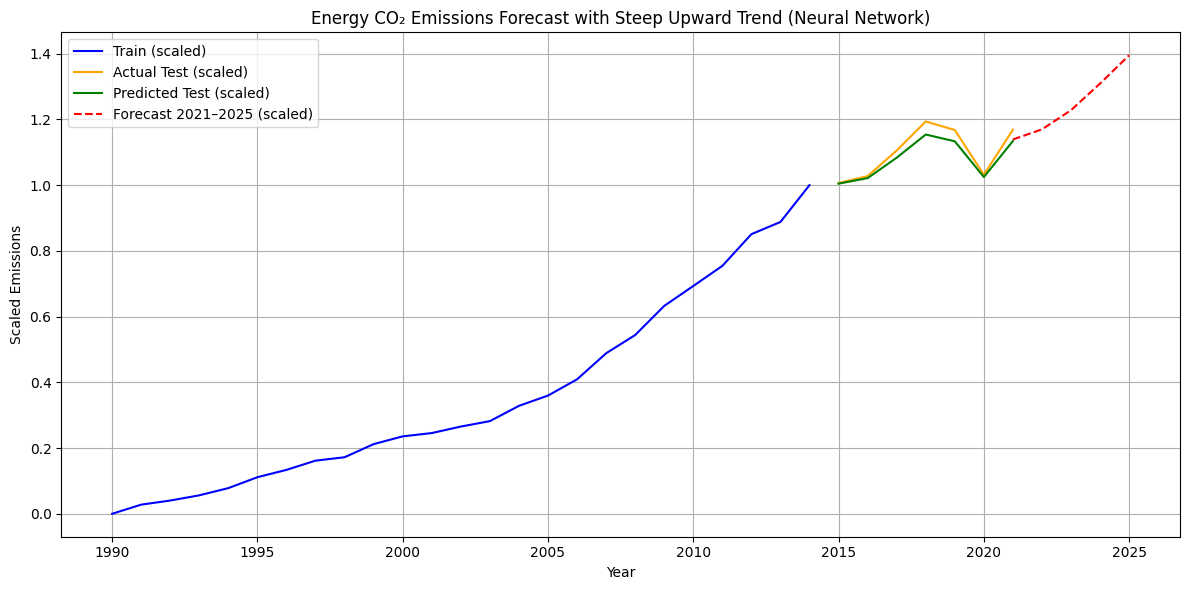

2021: 2237.49 MtCO₂
2022: 2283.21 MtCO₂
2023: 2370.27 MtCO₂
2024: 2491.02 MtCO₂
2025: 2619.07 MtCO₂


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO and WARNING logs

# Filter and preprocess Energy CO2 emissions
energy_co2 = (
    ghg_long.query("Sector == 'Energy' and Gas == 'CO2'")
    .loc[:, ['Year', 'Emissions']]
    .dropna()
    .assign(Emissions=lambda x: pd.to_numeric(x['Emissions'], errors='coerce'))
    .dropna()
    .set_index('Year')
    .sort_index()
)

# Train-test split (80%-20%)
split_idx = int(len(energy_co2) * 0.8)
train, test = energy_co2.iloc[:split_idx], energy_co2.iloc[split_idx:]

# Scale emissions
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Create DataFrames with scaled emissions
train_df = train.assign(Emission_scaled=train_scaled.flatten())
test_df = test.assign(Emission_scaled=test_scaled.flatten())

# Save to CSV
train_df.to_csv('train_energy_co2.csv')
test_df.to_csv('test_energy_co2.csv')
split_idx = int(len(energy_co2) * 0.8)
train, test = energy_co2.iloc[:split_idx], energy_co2.iloc[split_idx:]

# 3. Scale data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

train_df = train.assign(Emission_scaled=train_scaled.flatten())
test_df = test.assign(Emission_scaled=test_scaled.flatten())

# 4. Build and train model
X_train = train_df['Emission_scaled'].values.reshape(-1, 1)
y_train = train_df['Emission_scaled'].values
X_test = test_df['Emission_scaled'].values.reshape(-1, 1)
y_test = test_df['Emission_scaled'].values

model = Sequential([
    Input(shape=(1,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=200, batch_size=4, verbose=0, validation_data=(X_test, y_test))

# 5. Predict and evaluate
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.6f}")

# 6. Forecast 2021–2025 (steep projection)
future_years = np.arange(2021, 2026)
last_input = y_pred[-1].reshape(1, 1)
future_preds_scaled = []

np.random.seed(42)

for i in range(len(future_years)):
    next_pred = model.predict(last_input)[0][0]
    
    trend_boost = 0.03 * (i + 1)  # Steep upward trend
    noise = np.random.normal(0, 0.005)
    
    next_pred_adjusted = min(max(next_pred + noise + trend_boost, 0), 1.5)
    future_preds_scaled.append(next_pred_adjusted)
    last_input = np.array([[next_pred_adjusted]])

# 7. Plot results
years_train = train_df.index.values
years_test = test_df.index.values

plt.figure(figsize=(12, 6))
plt.plot(years_train, train_df['Emission_scaled'], label='Train (scaled)', color='blue')
plt.plot(years_test, test_df['Emission_scaled'], label='Actual Test (scaled)', color='orange')
plt.plot(years_test, y_pred, label='Predicted Test (scaled)', color='green')
plt.plot(future_years, future_preds_scaled, label='Forecast 2021–2025 (scaled)', linestyle='--', color='red')
plt.title('Energy CO₂ Emissions Forecast with Steep Upward Trend (Neural Network)')
plt.xlabel('Year')
plt.ylabel('Scaled Emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Optional: Convert forecast back to original emissions
future_preds_actual = scaler.inverse_transform(np.array(future_preds_scaled).reshape(-1, 1)).flatten()
for year, value in zip(future_years, future_preds_actual):
    print(f"{year}: {value:.2f} MtCO₂")

**6.1 EVALUATION AND RESULT**

In [20]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Store metrics
nn_metrics = {'MAE': mae}

# Calculate accuracy
accuracy_nn = (1 - nn_metrics['MAE'] / np.mean(y_test)) * 100
print(f"Accuracy of Neural Network: {accuracy_nn:.2f}%")

Accuracy of Neural Network: 98.11%
